<a href="https://colab.research.google.com/github/sandhrabijoy/Time-series/blob/main/Bitcoin_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
pip install pandas-datareader

In [106]:
import pandas_datareader.data as web
import datetime

In [107]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [108]:
pip install yfinance

In [109]:
import yfinance as yf

In [128]:
import datetime
start_date=datetime.datetime(2018, 1,1)
end_date=datetime.datetime(2020,12,2)
btc=yf.download('BTC-USD',start_date,end_date)['Close']
print(btc.head())

[*********************100%***********************]  1 of 1 completed


Ticker                          BTC-USD
Date                                   
2018-01-01 00:00:00+00:00  13657.200195
2018-01-02 00:00:00+00:00  14982.099609
2018-01-03 00:00:00+00:00  15201.000000
2018-01-04 00:00:00+00:00  15599.200195
2018-01-05 00:00:00+00:00  17429.500000


In [129]:
btc.to_csv("btc.csv")
print(btc.head())

Ticker                          BTC-USD
Date                                   
2018-01-01 00:00:00+00:00  13657.200195
2018-01-02 00:00:00+00:00  14982.099609
2018-01-03 00:00:00+00:00  15201.000000
2018-01-04 00:00:00+00:00  15599.200195
2018-01-05 00:00:00+00:00  17429.500000


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
btc.columns

Index(['BTC-USD'], dtype='object', name='Ticker')

In [132]:
btc.index

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-02 00:00:00+00:00',
               '2018-01-03 00:00:00+00:00', '2018-01-04 00:00:00+00:00',
               '2018-01-05 00:00:00+00:00', '2018-01-06 00:00:00+00:00',
               '2018-01-07 00:00:00+00:00', '2018-01-08 00:00:00+00:00',
               '2018-01-09 00:00:00+00:00', '2018-01-10 00:00:00+00:00',
               ...
               '2020-11-22 00:00:00+00:00', '2020-11-23 00:00:00+00:00',
               '2020-11-24 00:00:00+00:00', '2020-11-25 00:00:00+00:00',
               '2020-11-26 00:00:00+00:00', '2020-11-27 00:00:00+00:00',
               '2020-11-28 00:00:00+00:00', '2020-11-29 00:00:00+00:00',
               '2020-11-30 00:00:00+00:00', '2020-12-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=1066, freq=None)

In [133]:
btc.reset_index(inplace=True)
btc.head()

Ticker,Date,BTC-USD
0,2018-01-01 00:00:00+00:00,13657.200195
1,2018-01-02 00:00:00+00:00,14982.099609
2,2018-01-03 00:00:00+00:00,15201.000000
3,2018-01-04 00:00:00+00:00,15599.200195
4,2018-01-05 00:00:00+00:00,17429.500000


In [134]:
btc.columns


Index(['Date', 'BTC-USD'], dtype='object', name='Ticker')

In [135]:
btc['Date'] = pd.to_datetime(btc['Date'],format ='%Y-%m-%d')
print(btc.head())

Ticker                      Date       BTC-USD
0      2018-01-01 00:00:00+00:00  13657.200195
1      2018-01-02 00:00:00+00:00  14982.099609
2      2018-01-03 00:00:00+00:00  15201.000000
3      2018-01-04 00:00:00+00:00  15599.200195
4      2018-01-05 00:00:00+00:00  17429.500000


In [136]:
btc['Date'] = btc['Date'].dt.strftime('%Y-%m-%d')



In [137]:
btc.head()

Ticker,Date,BTC-USD
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000


In [138]:
sns.set()

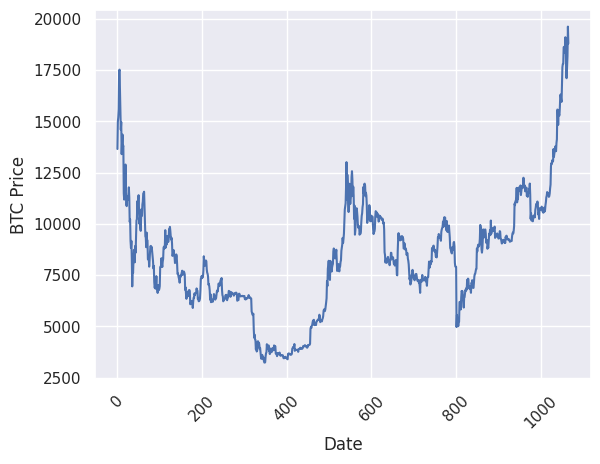

In [139]:
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc['BTC-USD'])

splitting data to train test split

In [142]:
btc['Date'] = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
btc.head()

Ticker,Date,BTC-USD
0,2018-01-01,13657.200195
1,2018-01-02,14982.099609
2,2018-01-03,15201.000000
3,2018-01-04,15599.200195
4,2018-01-05,17429.500000


In [144]:
btc.set_index('Date', inplace=True)

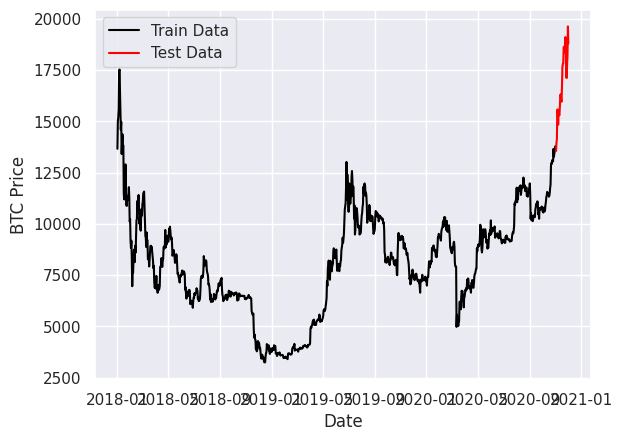

In [145]:
train = btc[btc.index < pd.to_datetime("2020-11-01", format="%Y-%m-%d")]
test= btc[btc.index > pd.to_datetime("2020-11-01",format="%Y-%m-%d")]

plt.plot(train.index, train['BTC-USD'], color="black", label="Train Data")
plt.plot(test.index, test['BTC-USD'], color="red", label="Test Data")


plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.legend()

plt.show()
